# Case Study 6 : Data Science in Any Data You Like

**Required Readings:** 
* In this case study, you could use any data as you like.
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using your Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
#We choose the dataset MNIST ("Modified National Institute of Standards and Technology"),  
#the classic dataset of handwritten images .
#Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.






















# Data Collection/Processing: 

In [1]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


Using TensorFlow backend.


In [2]:
train_file = 'train.csv'
test_file = 'test.csv'

#Load train data
#First row is the label, so skip the first row
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')

#Choose 90% data to train, 10% data to test accuracy
#x_train: pixel matrix of training data
#x_val: pixel matrix of testing data
#y_train: label vector of training data
#y_val: label vector of testing data
x_train, x_val, y_train, y_val = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1)


#Load test data
test = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')

In [3]:
print x_train.shape
print x_val.shape
print y_train.shape
print y_val.shape
print test.shape

(37800, 784)
(4200, 784)
(37800,)
(4200,)
(28000, 784)


In [4]:
#Input data should be 3 dimensions, height=28, width=28, layer=1
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [5]:
print test.shape

(28000, 28, 28, 1)


In [6]:
#Normalize data in pixel matrix
x_train = x_train/255.0
x_val = x_val/255.0
test = test/255.0

In [7]:
#Change label vector to label matrix, e.g: before:label[1] =2 ; after: label[1] = [0,0,1,0,0,0,0,0,0,0]
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Data Exploration: Exploring the your data

** plot some properties/statistics/distribution of your data** 

In [8]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#build a Sequential model
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [9]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
__________

In [10]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [11]:
#Test training process, epochs = 10
train_path = model.fit(x_train, y_train, batch_size = 16, epochs = 10, validation_data = (x_val, y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 42s - loss: 0.5036 - acc: 0.8383 - val_loss: 0.1409 - val_acc: 0.9576
Epoch 2/10
 - 42s - loss: 0.1593 - acc: 0.9506 - val_loss: 0.0880 - val_acc: 0.9743
Epoch 3/10
 - 41s - loss: 0.1131 - acc: 0.9644 - val_loss: 0.0709 - val_acc: 0.9800
Epoch 4/10
 - 43s - loss: 0.0912 - acc: 0.9705 - val_loss: 0.0599 - val_acc: 0.9819
Epoch 5/10
 - 41s - loss: 0.0755 - acc: 0.9758 - val_loss: 0.0515 - val_acc: 0.9840
Epoch 6/10
 - 41s - loss: 0.0663 - acc: 0.9797 - val_loss: 0.0494 - val_acc: 0.9862
Epoch 7/10
 - 42s - loss: 0.0598 - acc: 0.9808 - val_loss: 0.0466 - val_acc: 0.9869
Epoch 8/10
 - 43s - loss: 0.0550 - acc: 0.9821 - val_loss: 0.0410 - val_acc: 0.9881
Epoch 9/10
 - 44s - loss: 0.0481 - acc: 0.9839 - val_loss: 0.0426 - val_acc: 0.9883
Epoch 10/10
 - 46s - loss: 0.0432 - acc: 0.9859 - val_loss: 0.0419 - val_acc: 0.9879


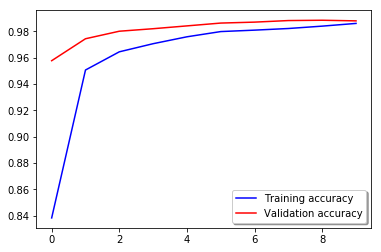

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(train_path.history['acc'], color='b', label="Training accuracy")
ax.plot(train_path.history['val_acc'], color='r',label="Validation accuracy")
legend = ax.legend(loc='best', shadow=True)

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [13]:
# We use this model to predict data in test file. In addition, we draw some pictures and predict.











Write codes to implement the solution in python:

In [14]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Predict the test data
test_results = model.predict(test)
test_results = np.argmax(test_results, axis=1)

result_list = test_results.tolist()


In [32]:
print test_results[:1000]

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7 6 8 8 3 8 2 1 2 2 0 4 1 7 0 0 0 1 9 0 1 6 5 8 8
 2 8 9 9 2 3 5 4 1 0 9 2 4 3 6 7 2 0 6 6 1 4 3 9 7 4 0 9 2 0 7 3 0 5 0 8 0
 0 4 7 1 7 1 1 3 3 3 7 2 8 6 3 8 7 7 4 3 5 6 0 0 0 3 1 3 6 4 3 4 5 5 8 7 7
 2 8 4 3 5 6 5 3 7 5 7 8 3 0 4 5 1 2 7 6 3 0 2 7 8 6 1 3 7 4 1 2 4 8 5 2 4
 9 2 1 6 0 6 1 4 9 6 0 9 7 6 9 1 9 0 9 9 0 8 4 6 2 0 9 3 6 3 2 1 6 3 4 2 3
 1 2 2 0 4 6 1 0 0 4 9 1 7 3 2 3 8 6 8 6 2 8 5 5 4 8 3 5 9 7 1 3 8 4 5 1 4
 5 6 3 3 5 7 0 6 8 3 1 6 0 6 3 9 5 1 5 8 4 0 9 2 0 5 3 7 1 9 9 5 7 7 9 9 6
 3 0 3 3 6 9 8 2 6 3 7 1 4 5 8 5 9 0 0 3 8 4 1 8 4 1 1 9 8 4 5 1 5 3 6 3 1
 3 0 9 0 0 6 0 6 3 1 8 6 0 6 5 2 2 6 7 7 2 5 8 3 9 2 7 8 6 3 8 4 2 3 8 1 6
 4 8 7 9 7 6 9 5 3 7 6 5 5 4 2 6 2 1 3 7 1 7 9 9 6 1 1 1 7 3 9 7 6 1 1 1 9
 3 8 5 5 0 4 1 2 3 1 1 3 5 9 6 6 5 3 1 4 7 4 7 4 8 5 2 6 1 3 9 5 0 8 4 7 4
 4 4 1 5 3 9 5 7 6 9 5 9 2 3 5 6 6 7 5 0 5 1 7 4 4 1 1 4 9 5 6 0 1 3 1 0 4
 8 1 2 7 9 4 8 3 7 7 4 2 

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [15]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Draw picture based on the pixel data
def show_pic(pixel_data):
    return plt.imshow(pixel_data, cmap='gray')


In [16]:
def show_test_pic(i):
    predict_label = result_list[i]
    pixel_data = test[i][:, :, 0]
    p = show_pic(pixel_data)
    return predict_label, p

In [17]:
print test[1][:, :, 0].shape

(28, 28)


(2, <matplotlib.image.AxesImage at 0x11668c350>)

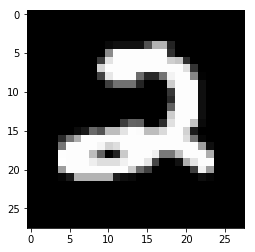

In [18]:
#Test some pictures in "test.csv" file

#The first picture in test file and its prediction result
show_test_pic(0)

(6, <matplotlib.image.AxesImage at 0x11677c390>)

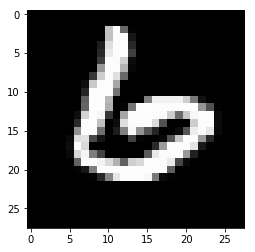

In [19]:
#The 3000th picture in test file and its prediction result
show_test_pic(3000)

(0, <matplotlib.image.AxesImage at 0x11702be90>)

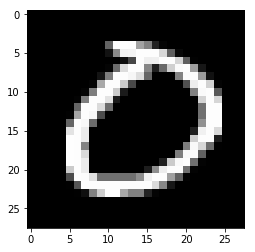

In [20]:
show_test_pic(1500)

(1, <matplotlib.image.AxesImage at 0x117a08990>)

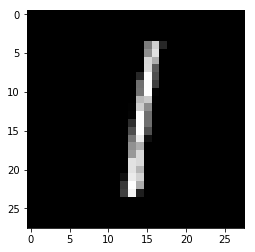

In [21]:
show_test_pic(800)

(0, <matplotlib.image.AxesImage at 0x118068590>)

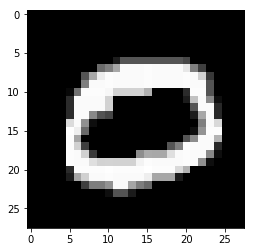

In [22]:
show_test_pic(1)

In [23]:
#Try some drawing pictures to test prediction
from PIL import Image
import numpy as np, pandas as pd
import matplotlib.pyplot as plt


#Change picture to pixel array
def image2pixelarray(filepath):
    img = Image.open(filepath).convert('L')
    img = img.resize((28, 28), Image.LANCZOS)
    greyscale_map = list(img.getdata())
    greyscale_map = np.array(greyscale_map)
    return greyscale_map


def array2image(filename):
    file = open(filename)
    array = pd.read_csv(file)
    array = array.as_matrix()
    for row in array:
        data = row[1:].reshape(28, 28)
        plt.gray()
        plt.imshow(data)
        plt.show()
        plt.savefig(row+'.png')

In [24]:
#Normalize the pixel array
def normalize_pixelarray(greyscale_map):
    nor_pixelarray = (255.0 - greyscale_map)/255.0
    return nor_pixelarray

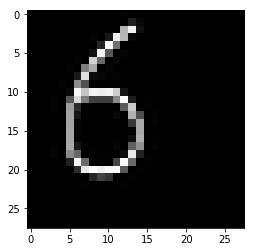

In [25]:
a = image2pixelarray('6.png')
a = normalize_pixelarray(a)

#Change the array to 28*28 because the input of drawing picture on notebook should be an array of 28*28
b = a.reshape(28, 28)
#Show the picture on note
pic = show_pic(b)

In [26]:
#Predict
pre_result = model.predict(a.reshape(-1,28,28,1))
print pre_result

[[0.03012515 0.03206087 0.11619353 0.05967776 0.05587334 0.37642366
  0.01820118 0.05645943 0.06504354 0.18994159]]


In [27]:
#Show the prediction result with max probability
print np.argmax(pre_result)

5


[[0.00184568 0.05493039 0.02448544 0.04132996 0.34819216 0.03963431
  0.00431698 0.16512762 0.1046107  0.21552674]]


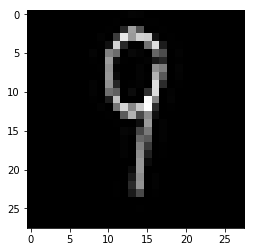

In [28]:
a1 = image2pixelarray('9.png')
a1 = normalize_pixelarray(a1)
b1 = a1.reshape(28, 28)
pic1 = show_pic(b1)


pre_result1 = model.predict(a1.reshape(-1,28,28,1))
print pre_result1

In [29]:
print np.argmax(pre_result1)

4


[[0.03012515 0.03206087 0.11619353 0.05967776 0.05587334 0.37642366
  0.01820118 0.05645943 0.06504354 0.18994159]]
5


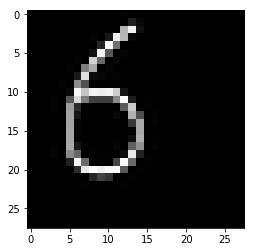

In [37]:
a2 = image2pixelarray('6.png')
a2 = normalize_pixelarray(a2)
b2 = a2.reshape(28, 28)
pic2 = show_pic(b2)


pre_result2 = model.predict(a2.reshape(-1,28,28,1))
print pre_result2
print np.argmax(pre_result2)

[[8.9731888e-04 8.1247315e-03 8.3752191e-03 6.2370136e-02 3.2793302e-02
  8.7024525e-02 5.2655564e-04 7.6399910e-01 1.4534283e-02 2.1354770e-02]]
7


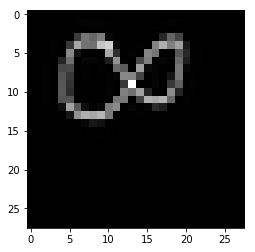

In [39]:
a3 = image2pixelarray('1.png')
a3 = normalize_pixelarray(a3)
b3 = a3.reshape(28, 28)
pic3 = show_pic(b3)


pre_result3 = model.predict(a3.reshape(-1,28,28,1))
print pre_result3
print np.argmax(pre_result3)

[[0.00089106 0.02294108 0.01373167 0.05572838 0.18198328 0.01303824
  0.0008202  0.12269532 0.06076566 0.52740514]]
9


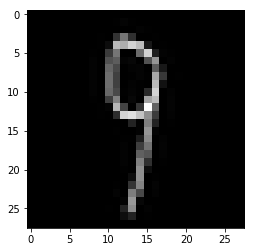

In [45]:
#For presentation
a4 = image2pixelarray('9.png')
a4 = normalize_pixelarray(a4)
b4 = a4.reshape(28, 28)
pic4 = show_pic(b4)


pre_result4 = model.predict(a4.reshape(-1,28,28,1))
print pre_result4
print np.argmax(pre_result4)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 6".
        
** Note: Each team only needs to submit one submission in Canvas **